In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./preprocessing_DataFrame_fin.csv')
iowa_data = pd.read_csv('./iowa_ames.csv')
train_df = train_df.drop('Id', axis=1)
train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.188663,-0.189868,0.667499,-0.477387,1.151867,0.908055,1.218044,1.106239,-0.194398,0.684036,...,False,False,False,False,True,False,False,False,True,False
1,0.547843,0.080228,-0.042192,2.011352,0.006695,-0.621670,-0.827466,-0.655811,-0.194398,0.684036,...,False,False,False,False,True,False,False,False,True,False
2,-0.037209,0.429983,0.667499,-0.477387,1.055357,0.835594,1.179948,1.106239,-0.194398,0.684036,...,False,False,False,False,True,False,False,False,True,False
3,-0.446327,0.068980,0.667499,-0.477387,-1.629540,-0.863478,-0.827466,-0.655811,-0.194398,-0.819105,...,False,False,False,False,True,False,False,False,False,False
4,0.736265,0.983275,1.350924,-0.477387,1.007861,0.694898,1.324337,1.106239,-0.194398,0.684036,...,False,False,False,False,True,False,False,False,True,False


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 226 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(181), float64(45)
memory usage: 771.5 KB


In [3]:
train_df.describe(include='float64').round(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.81,-3.20,-4.27,-6.13,-2.28,-1.49,-0.83,-4.09,-9.52,-2.71,...,-0.95,-1.07,-0.41,-0.13,-0.29,-0.07,-0.19,-2.18,-1.37,-4.15
25%,-0.45,-0.42,-0.78,-0.48,-0.71,-0.97,-0.83,-0.66,-0.19,-0.82,...,-0.95,-1.07,-0.41,-0.13,-0.29,-0.07,-0.19,-0.44,-0.61,-0.61
50%,0.07,0.05,-0.04,-0.48,-0.10,0.30,-0.83,-0.66,-0.19,0.68,...,-0.95,0.43,-0.41,-0.13,-0.29,-0.07,-0.19,-0.07,0.14,-0.04
75%,0.50,0.48,0.67,0.44,1.01,0.98,1.18,1.11,-0.19,0.68,...,1.04,0.89,-0.41,-0.13,-0.29,-0.07,-0.19,0.65,0.89,0.64
max,4.71,4.86,2.65,2.70,1.51,1.46,1.54,2.15,4.42,1.93,...,1.52,1.89,2.46,7.74,3.40,14.41,5.20,1.96,1.64,3.59


In [4]:
# 추출하려는 범주형 변수들 (X_cols)
X_cols = [
    'Neighborhood', 'MSSubClass', 'MSZoning', 'GarageFinish',
    'FireplaceQu', 'GarageType', 'ExterQual', 'KitchenQual',
    'BsmtQual', 'CentralAir', 'HeatingQC', 'TotRmsAbvGrd',
    'TotalBaths', 'TotalBsmtArea', 'BuildingQuality'
]

# X_cols에 포함된 변수들로 시작하는 열 이름 추출
selected_columns = [
    col for col in train_df.columns if any(col.startswith(prefix + "_") for prefix in X_cols)
]

# 추출된 열 목록 출력
print("모델에 사용할 열들:")
print(selected_columns)


모델에 사용할 열들:
['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'CentralAir_Y', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Det

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 새로운 피처 생성
train_df['BuildingAge'] = train_df['YearRemodAdd'] - train_df['YearBuilt']  # 건축 연령 = 리모델링 연도 - 건축 연도
train_df['TotalBsmtArea'] = train_df['TotalBsmtSF']  # 총 지하실 면적 (TotalBsmtSF만 사용)
# dataset_df['TotalLivingArea'] = dataset_df['GrLivArea']   # 지상 생활 공간 면적 (GrLivArea만 사용 <= 'GrLivArea' = 1stFlrSF + 2stFlrSF )
train_df['TotalBaths'] = train_df['FullBath'] + train_df['HalfBath'] * 0.5 + train_df['BsmtFullBath'] + train_df['BsmtHalfBath'] * 0.5

# 총 욕실 개수 = 전체 욕실 + 반 욕실 (0.5로 환산) + 지하실 전체 욕실 + 지하실 반 욕실 (0.5로 환산)
train_df['BuildingQuality'] = (train_df['OverallQual'] + train_df['OverallCond']) / 2  # 건물 품질 = (전반적인 품질 + 전반적인 상태) / 2

# 필요 없는 컬럼 드롭 (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, 1stFlrSF, 2ndFlrSF)
train_df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF'], inplace=True, errors='ignore')


# X_cols = ['Neighborhood', 'LotArea', 'MSSubClass', 'LotFrontage', 'MSZoning',
#           'GarageCars', 'GarageArea', 'GarageFinish', 'FireplaceQu', 'GarageType', 
#           'ExterQual', 'KitchenQual', 'BsmtQual', 'CentralAir', 'HeatingQC', 'GrLivArea', 
#           'TotRmsAbvGrd', 'TotalBaths', 'TotalBsmtArea', 'BuildingQuality']

# 특성 및 타겟 분리
X = train_df[selected_columns]
y = train_df['SalePrice']
# X_test = test_df[X_cols]

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 스케일링 적용 학습 후 평가해보기
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge 회귀 모델 학습 및 평가
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f'Ridge 회귀 MSE: {ridge_mse}')

# Lasso 회귀 모델 학습 및 평가
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f'Lasso 회귀 MSE: {lasso_mse}')


Ridge 회귀 MSE: 0.2981321072074546
Lasso 회귀 MSE: 0.5142782764020165


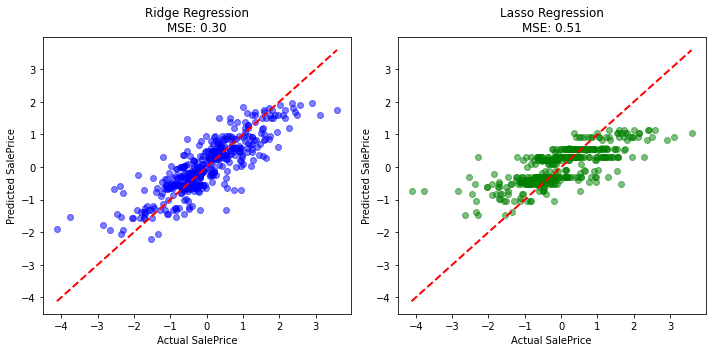

In [24]:
# Ridge 예측 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(f'Ridge Regression\nMSE: {ridge_mse:.2f}')

# Lasso 예측 시각화
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(f'Lasso Regression\nMSE: {lasso_mse:.2f}')

plt.tight_layout()
plt.show()

In [25]:
import numpy as np

# Yeo-Johnson 변환에 활용된 람다값
lambda_ = -0.044048042422657335

# 정규화에 사용된 SalePrice의 평균 및 표준편차
SalePrice_mean = 9.3309226951343
SalePrice_std = 0.23274601184129493

# 역변환 함수 정의 (Yeo-Johnson 변환의 역변환)
def inverse_yeojohnson(y, lambda_):
    y = np.asarray(y)  # NumPy 배열로 변환

    # 각 요소에 대해 역변환 수행
    for i in range(len(y)):
        if y[i] >= 0 and lambda_ == 0:
            y[i] = np.exp(y[i]) - 1
        elif y[i] >= 0 and lambda_ != 0:
            y[i] = (y[i] * lambda_ + 1) ** (1 / lambda_) - 1
        elif y[i] < 0 and lambda_ != 2:
            y[i] = 1 - (-(2 - lambda_) * y[i] + 1) ** (1 / (2 - lambda_))
        elif y[i] < 0 and lambda_ == 2:
            y[i] = 1 - np.exp(-y[i])
    
    return y  # 변환된 결과 반환

# 1. 예측값 preds가 정규화된 상태로 주어진 경우
# preds = np.array([2.5, 3.1, 2.8])  # 예제 예측값 (표준화된 값)
model_preds = ridge_pred

# # 2. 정규화(표준화) 해제: 평균과 표준편차 사용
# preds = preds * SalePrice_std
# preds = preds + SalePrice_mean
# print("정규화 해제된 예측값:", preds)
model_preds = model_preds * SalePrice_std
model_preds = model_preds + SalePrice_mean
y_test = y_test * SalePrice_std
y_test = y_test + SalePrice_mean

# 3. Yeo-Johnson 역변환 수행
model_preds = inverse_yeojohnson(model_preds, lambda_)
y_test = inverse_yeojohnson(y_test, lambda_)
print("Yeo-Johnson 역변환된 예측값:", model_preds)


Yeo-Johnson 역변환된 예측값: [147546.18881861 303822.66332725  98831.23681151 134002.5361775
 229561.31567399  89941.0894044  189769.18445731 138635.56119144
  89941.0894044  128707.13437946 138425.26414062 167248.81120376
  90446.22464148 286429.49015336 184515.90979611 133681.46945666
 201247.40681168 153867.13284013  91157.29204599 192052.31833086
 147546.18881861 242788.15182552 228467.8336953  167703.21682992
 209499.34901045 151323.84346659 184627.86280039 146410.66774765
 201247.40681168 181722.72340627 129073.05253552 325963.66643165
 185686.24145406 133119.08473181 243769.19288137 153867.13284013
 137209.08200951 237992.766164   303822.66332725 128345.00989211
 134002.5361775  201701.38168992 133119.08473181 286429.49015336
 127684.50426236 148138.87902095 133681.46945666 128222.93818668
 325963.66643165 137209.08200951 133681.46945666 167248.81120376
 117587.39220358 229561.31567399 178515.7555659  209499.34901045
 174946.00205872 181682.20179535 127111.83287911 133119.08473181
  77

Text(0.5, 1.0, 'Ridge Regression\nMSE: 0.30')

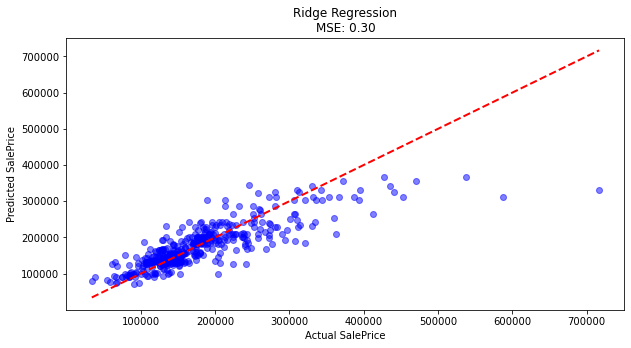

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, model_preds, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title(f'Ridge Regression\nMSE: {ridge_mse:.2f}')

In [27]:
# Ridge 회귀 모델의 회귀계수 확인
ridge_coefficients = ridge.coef_

print("Ridge 회귀계수:")
for feature, coef in zip(X.columns, ridge_coefficients):
    print(f"{feature}: {coef:.4f}")

# 회귀계수를 데이터프레임으로 정리 (선택사항)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge_Coefficient': ridge_coefficients
})

print("\n회귀계수 데이터프레임:")
print(coeff_df)

Ridge 회귀계수:
MSSubClass_30: -0.1394
MSSubClass_40: 0.0164
MSSubClass_45: -0.0356
MSSubClass_50: 0.0195
MSSubClass_60: 0.0871
MSSubClass_70: 0.0782
MSSubClass_75: 0.1051
MSSubClass_80: 0.0088
MSSubClass_85: -0.0097
MSSubClass_90: 0.0035
MSSubClass_120: -0.1168
MSSubClass_160: -0.1249
MSSubClass_180: -0.0514
MSSubClass_190: 0.0220
MSZoning_FV: 0.0091
MSZoning_RH: 0.0084
MSZoning_RL: 0.1108
MSZoning_RM: 0.1358
Neighborhood_Blueste: -0.0324
Neighborhood_BrDale: -0.1046
Neighborhood_BrkSide: -0.1819
Neighborhood_ClearCr: -0.0005
Neighborhood_CollgCr: -0.0650
Neighborhood_Crawfor: 0.0096
Neighborhood_Edwards: -0.2495
Neighborhood_Gilbert: -0.1160
Neighborhood_IDOTRR: -0.1787
Neighborhood_MeadowV: -0.1255
Neighborhood_Mitchel: -0.1003
Neighborhood_NAmes: -0.2765
Neighborhood_NPkVill: -0.0053
Neighborhood_NWAmes: -0.0784
Neighborhood_NoRidge: 0.1166
Neighborhood_NridgHt: 0.1694
Neighborhood_OldTown: -0.2637
Neighborhood_SWISU: -0.0915
Neighborhood_Sawyer: -0.1856
Neighborhood_SawyerW: -0.0576
N

In [28]:
# 3. 데이터에 원핫 인코딩 적용 (필요한 컬럼만 인코딩)
encoded_data = pd.get_dummies(iowa_data)

# 누락된 열을 0으로 채움
for col in coeff_df['Feature']:
    if col not in encoded_data.columns:
        encoded_data[col] = 0

# 4. 회귀계수와 동일한 열만 선택
encoded_data = encoded_data[coeff_df['Feature'].values]

# 5. 회귀계수와 데이터를 곱한 후 합산해 예측값 계산
preds = np.dot(encoded_data, coeff_df['Ridge_Coefficient'].values)

#여존슨 역변환
preds = preds * SalePrice_std
preds = preds + SalePrice_mean
preds = inverse_yeojohnson(preds, lambda_)

# 6. 예측 결과 출력
# house index를 활용해 본 데이터셋의 시계열 기준 중앙값이 2008년 4월 과 가장 최근 index인 2024년 7월값 비교
iowa_data['Predicted_SalePrice'] = preds * (325.784/167.323)
print(iowa_data[['Neighborhood', 'SalePrice', 'Predicted_SalePrice']].head())

  Neighborhood  SalePrice  Predicted_SalePrice
0        SWISU     239900        317685.262901
1      OldTown     165000        303579.333924
2       Sawyer     249900        318731.124669
3      Veenker     379900        347553.099217
4     Mitchell     679900        346423.484972


Text(0.5, 1.0, 'Ridge Regression')

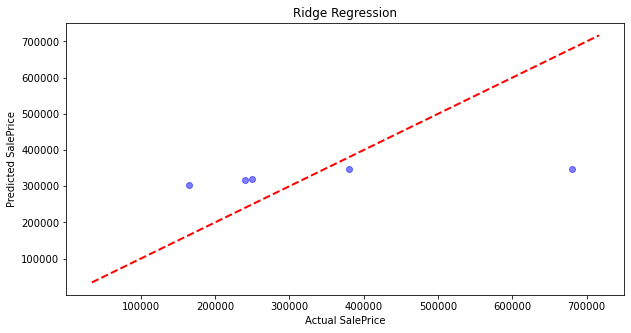

In [29]:
actual_price = iowa_data['SalePrice']
model_pred = iowa_data['Predicted_SalePrice']

plt.figure(figsize=(10, 5))
plt.scatter(actual_price, model_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Ridge Regression')